In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [2]:
df=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


* We have input as advertising modes such as : TV,Radio,Newspaper
* And output as Sales

# EDA

In [3]:
#We can drop Unnamed:0 feature as it's not that important for our datset
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

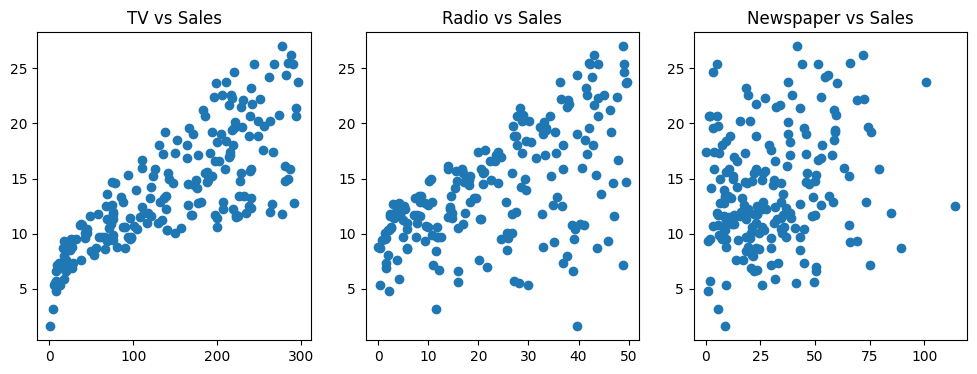

In [7]:
#By using Scater plot we can find the relationships between features and target feature
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs Sales')
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs Sales')
plt.show()

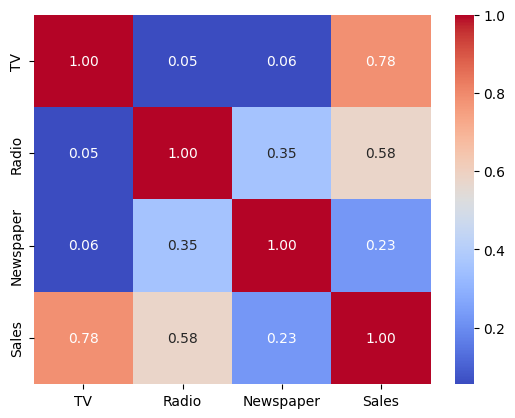

In [8]:
#Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


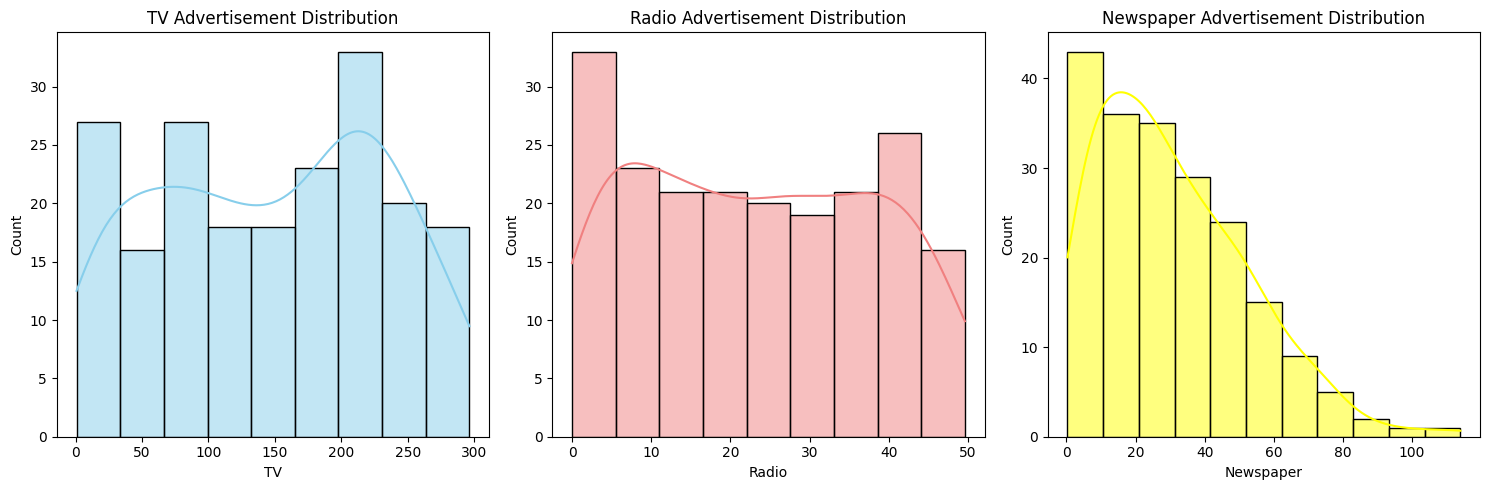

In [9]:
#Histplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='skyblue')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='lightcoral')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

# Model Training

In [10]:
#Split the dataset
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [11]:
#Spliting into training and testig part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [14]:
#Evaluate Linear Regression Model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [15]:
#Train a Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [16]:
#Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Regression:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')


Random Forest Regression:
Mean Squared Error: 0.5326630999999983
R-squared: 0.9831241301539057


In [17]:
#Train a Gradiant Boost Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [18]:
#Evaluate Gradiant Boost Model
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("\nGradient Boosting Regression:")
print(f'Mean Squared Error: {gb_mse}')
print(f'R-squared: {gb_r2}')


Gradient Boosting Regression:
Mean Squared Error: 0.5273752182218999
R-squared: 0.9832916611967895


We can take Gradient boosting as our choosen model

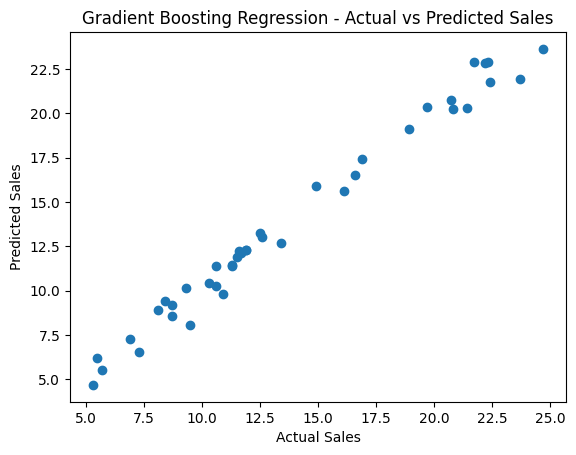

In [19]:
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boosting Regression - Actual vs Predicted Sales')
plt.show()